ΚΥΡΙΤΣΗΣ ΧΡΗΣΤΟΣ 1115 2021 00075

ΜΗΛΑΣ ΙΩΑΝΝΗΣ 1115 2021 00100

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!mkdir 'sample_data/data_files'
!mkdir 'sample_data/data_files/2019'
!mkdir 'sample_data/data_files/2023'

mkdir: cannot create directory ‘sample_data/data_files’: File exists
mkdir: cannot create directory ‘sample_data/data_files/2019’: File exists
mkdir: cannot create directory ‘sample_data/data_files/2023’: File exists


#Q1

In [44]:
import pandas as pd
import numpy as np
import os
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Check if text is NaN
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Remove symbols: hashtags, emoticons, emojis, links
        text = re.sub(r'#\S+', '', text)
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove words with 2 or fewer characters
        # Remove stopwords
        text = ' '.join([word for word in text.split() if word not in stop_words])
    else:
        # If text is NaN, return an empty string
        text = ''
    return text

# Define the folder paths
folder_paths = ['/content/drive/MyDrive/data/2019/april/',
                '/content/drive/MyDrive/data/2019/febrouary/',
                '/content/drive/MyDrive/data/2019/march/']

# List to hold DataFrames for comments
comments_dfs = []

# Iterate over each folder path to read reviews.xlsx
for folder_path in folder_paths:
    reviews_file_path = os.path.join(folder_path, 'reviews.csv')
    if os.path.exists(reviews_file_path):
        print("Reading file:", reviews_file_path)  # Add this line for debugging
        reviews_df = pd.read_csv(reviews_file_path)
        # Extract only the necessary columns
        comments_df = reviews_df[['listing_id', 'comments']]  # Assuming the column name is 'listing_id'
        # Apply preprocessing to comments
        comments_df['comments'] = comments_df['comments'].apply(preprocess_text)
        # Extract month from folder path
        month = os.path.basename(os.path.normpath(folder_path))
        comments_df['month'] = month
        comments_dfs.append(comments_df)
    else:
        print("File not found:", reviews_file_path)  # Add this line for debugging

# Concatenate all comments DataFrames
if comments_dfs:
    comments_df = pd.concat(comments_dfs, ignore_index=True)
    print("Concatenation successful!")  # Add this line for debugging
else:
    print("No files found to concatenate!")  # Add this line for debugging

# Remove rows with NaN comments
comments_df = comments_df.dropna(subset=['comments'])

# Save the final DataFrame to a CSV file
comments_df.to_csv('sample_data/data_files/2019/rev_2019.csv', index=False)

print("File saved: sample_data/data_files/2019/rev_2019.csv")


Reading file: /content/drive/MyDrive/data/2019/april/reviews.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-44-eb82f21a9b77>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['comments'] = comments_df['comments'].apply(preprocess_text)
<ipython-input-44-eb82f21a9b77>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['month'] = month


Reading file: /content/drive/MyDrive/data/2019/febrouary/reviews.csv


<ipython-input-44-eb82f21a9b77>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['comments'] = comments_df['comments'].apply(preprocess_text)
<ipython-input-44-eb82f21a9b77>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['month'] = month


Reading file: /content/drive/MyDrive/data/2019/march/reviews.csv


<ipython-input-44-eb82f21a9b77>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['comments'] = comments_df['comments'].apply(preprocess_text)
<ipython-input-44-eb82f21a9b77>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['month'] = month


Concatenation successful!
File saved: sample_data/data_files/2019/rev_2019.csv


In [45]:
import pandas as pd
import numpy as np
import os
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Check if text is NaN
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Remove symbols: hashtags, emoticons, emojis, links
        text = re.sub(r'#\S+', '', text)
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove words with 2 or fewer characters
        # Remove stopwords
        text = ' '.join([word for word in text.split() if word not in stop_words])
    else:
        # If text is NaN, return an empty string
        text = ''
    return text

# Define the folder paths
folder_paths = ['/content/drive/MyDrive/data/2023/june/',
                '/content/drive/MyDrive/data/2023/march/',
                '/content/drive/MyDrive/data/2023/september/']

# List to hold DataFrames for comments
comments_dfs = []

# Iterate over each folder path to read reviews.xlsx
for folder_path in folder_paths:
    reviews_file_path = os.path.join(folder_path, 'reviews.csv')
    if os.path.exists(reviews_file_path):
        print("Reading file:", reviews_file_path)  # Add this line for debugging
        reviews_df = pd.read_csv(reviews_file_path)
        # Extract only the necessary columns
        comments_df = reviews_df[['listing_id', 'comments']]  # Assuming the column name is 'listing_id'
        # Apply preprocessing to comments
        comments_df['comments'] = comments_df['comments'].apply(preprocess_text)
        # Extract month from folder path
        month = os.path.basename(os.path.normpath(folder_path))
        comments_df['month'] = month
        comments_dfs.append(comments_df)
    else:
        print("File not found:", reviews_file_path)  # Add this line for debugging

# Concatenate all comments DataFrames
if comments_dfs:
    comments_df = pd.concat(comments_dfs, ignore_index=True)
    print("Concatenation successful!")  # Add this line for debugging
else:
    print("No files found to concatenate!")  # Add this line for debugging

# Remove rows with NaN comments
comments_df = comments_df.dropna(subset=['comments'])

# Save the final DataFrame to a CSV file
comments_df.to_csv('sample_data/data_files/2023/rev_2023.csv', index=False)

print("File saved: sample_data/data_files/2023/rev_2023.csv")

Reading file: /content/drive/MyDrive/data/2023/june/reviews.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-45-7c756186ca69>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['comments'] = comments_df['comments'].apply(preprocess_text)
<ipython-input-45-7c756186ca69>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['month'] = month


Reading file: /content/drive/MyDrive/data/2023/march/reviews.csv


<ipython-input-45-7c756186ca69>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['comments'] = comments_df['comments'].apply(preprocess_text)
<ipython-input-45-7c756186ca69>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['month'] = month


Reading file: /content/drive/MyDrive/data/2023/september/reviews.csv


<ipython-input-45-7c756186ca69>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['comments'] = comments_df['comments'].apply(preprocess_text)
<ipython-input-45-7c756186ca69>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['month'] = month


Concatenation successful!
File saved: sample_data/data_files/2023/rev_2023.csv


In [46]:
import pandas as pd
import numpy as np
from transformers import pipeline

# Load the sentiment analysis pipeline
nlp = pipeline("sentiment-analysis")

# Function to preprocess text and truncate to max_length
def preprocess_text(text, max_length=512):
    text = str(text).lower()[:max_length]  # Convert to lowercase and truncate to max_length
    return text

# Function to annotate sentiment for a chunk of comments
def annotate_sentiment(chunk):
    annotations = []
    for comment in chunk['comments']:  # Assuming the column name is 'comments'
        result = nlp(preprocess_text(comment))
        sentiment = result[0]['label']
        annotations.append(sentiment)
    chunk['sentiment'] = annotations
    return chunk

# Load the reviews data
reviews_df = pd.read_csv('sample_data/data_files/2019/rev_2019.csv')

# Take a random sample of 1500 rows
reviews_sample_df = reviews_df.sample(n=1500, random_state=42)

# Split the dataframe into smaller chunks if it's too large
chunks = [reviews_sample_df[i:i+100] for i in range(0, len(reviews_sample_df), 100)]

# List to hold annotated chunks
annotated_chunks = []

# Annotate sentiment for each chunk
for i, chunk in enumerate(chunks, start=1):
    print(f"Processing chunk {i}/{len(chunks)}")
    annotated_chunk = annotate_sentiment(chunk)
    annotated_chunks.append(annotated_chunk)

# Concatenate all annotated chunks
annotated_df = pd.concat(annotated_chunks, ignore_index=True)

# Add unique IDs to the dataframe
annotated_df['id'] = range(1, len(annotated_df) + 1)

# Reorder columns
annotated_df = annotated_df[['id', 'comments', 'sentiment','month']]  # Assuming the column name is 'comments'

# Save the annotated DataFrame to a new CSV file
annotated_df.to_csv('sample_data/data_files/2019/rev_2019_1500_random.csv', index=False)

print("Annotation completed and saved to 'sample_data/data_files/2019/rev_2019_1500_random.csv'")



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Processing chunk 1/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 2/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 3/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 4/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 5/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 6/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 7/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 8/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 9/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 10/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 11/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 12/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 13/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 14/15


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 15/15
Annotation completed and saved to 'sample_data/data_files/2019/rev_2019_1500_random.csv'


<ipython-input-46-274fa6c62c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


In [47]:
import pandas as pd
import numpy as np
from transformers import pipeline

# Load the sentiment analysis pipeline
nlp = pipeline("sentiment-analysis")

# Function to preprocess text and truncate to max_length
def preprocess_text(text, max_length=512):
    text = str(text).lower()[:max_length]  # Convert to lowercase and truncate to max_length
    return text

# Function to annotate sentiment for a chunk of comments
def annotate_sentiment(chunk):
    annotations = []
    for comment in chunk['comments']:  # Assuming the column name is 'comments'
        result = nlp(preprocess_text(comment))
        sentiment = result[0]['label']
        annotations.append(sentiment)
    chunk['sentiment'] = annotations
    return chunk

# Load the reviews data
reviews_df = pd.read_csv('sample_data/data_files/2023/rev_2023.csv')

# Take a random sample of 1500 rows
reviews_sample_df = reviews_df.sample(n=1500, random_state=42)

# Split the dataframe into smaller chunks if it's too large
chunks = [reviews_sample_df[i:i+100] for i in range(0, len(reviews_sample_df), 100)]

# List to hold annotated chunks
annotated_chunks = []

# Annotate sentiment for each chunk
for i, chunk in enumerate(chunks, start=1):
    print(f"Processing chunk {i}/{len(chunks)}")
    annotated_chunk = annotate_sentiment(chunk)
    annotated_chunks.append(annotated_chunk)

# Concatenate all annotated chunks
annotated_df = pd.concat(annotated_chunks, ignore_index=True)

# Add unique IDs to the dataframe
annotated_df['id'] = range(1, len(annotated_df) + 1)

# Reorder columns
annotated_df = annotated_df[['id', 'comments', 'sentiment','month']]  # Assuming the column name is 'comments'

# Save the annotated DataFrame to a new CSV file
annotated_df.to_csv('sample_data/data_files/2023/rev_2023_1500_random.csv', index=False)

print("Annotation completed and saved to 'sample_data/data_files/2023/rev_2023_1500_random.csv'")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Processing chunk 1/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 2/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 3/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 4/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 5/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 6/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 7/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 8/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 9/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 10/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 11/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 12/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 13/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 14/15


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


Processing chunk 15/15
Annotation completed and saved to 'sample_data/data_files/2023/rev_2023_1500_random.csv'


<ipython-input-47-f5aa55b15dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = annotations


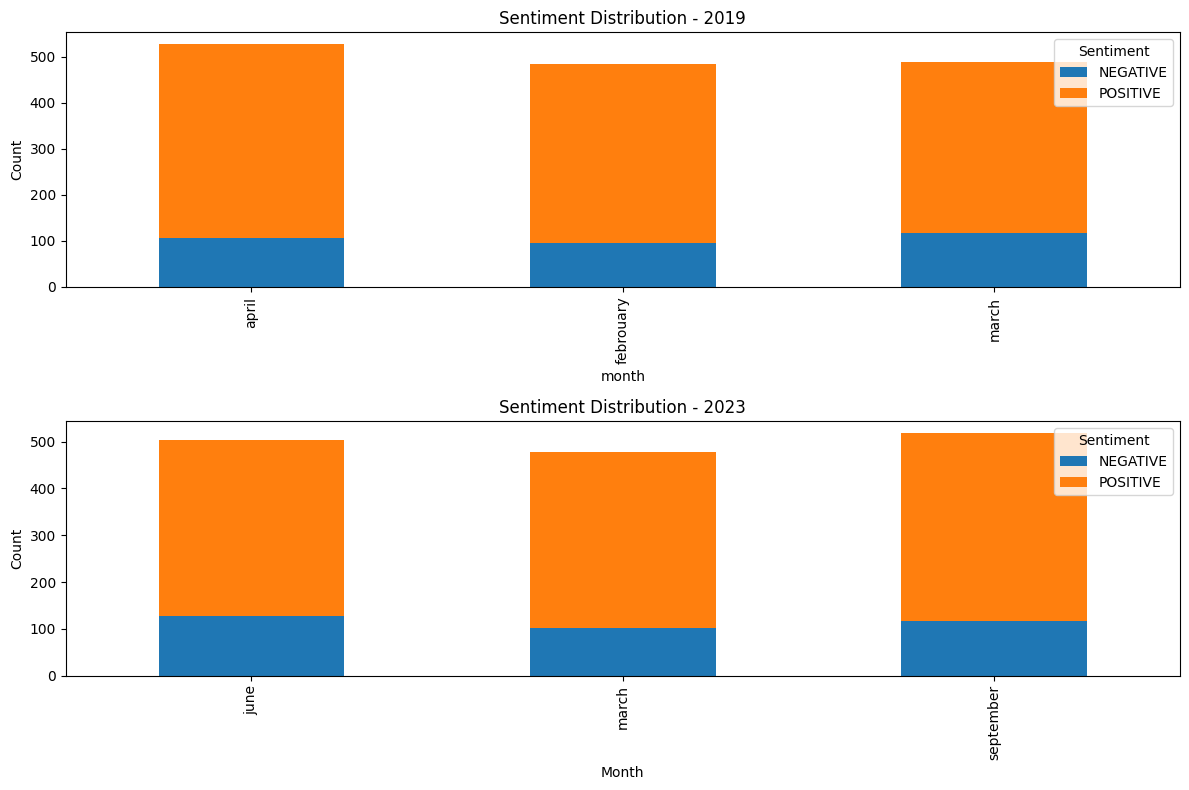

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
rev_2019_df = pd.read_csv('sample_data/data_files/2019/rev_2019_1500_random.csv')
rev_2023_df = pd.read_csv('sample_data/data_files/2023/rev_2023_1500_random.csv')

# Group the data by year, month, and sentiment for each DataFrame
grouped_2019 = rev_2019_df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
grouped_2023 = rev_2023_df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)

# Plot histograms for each year with different months
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot histograms for 2019
grouped_2019.plot(kind='bar', stacked=True, ax=axes[0], title='Sentiment Distribution - 2019')

# Plot histograms for 2023
grouped_2023.plot(kind='bar', stacked=True, ax=axes[1], title='Sentiment Distribution - 2023')

# Set labels and legend
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Month')
axes[0].legend(title='Sentiment', loc='upper right')
axes[1].legend(title='Sentiment', loc='upper right')

plt.tight_layout()
plt.show()



#Q2

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
import pickle

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, float) and np.isnan(text):
        return ''  # Return an empty string if NaN
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', text)
    return text

# Load data
data = pd.read_csv('sample_data/data_files/2023/rev_2023_1500_random.csv')

# Split the data into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Preprocess text
train_sentences = [preprocess_text(review) for review in train_data['comments']]
test_sentences = [preprocess_text(review) for review in test_data['comments']]

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess_text)

# Fit and transform train data
train_tfidf_features = tfidf_vectorizer.fit_transform(train_sentences)

# Transform test data
test_tfidf_features = tfidf_vectorizer.transform(test_sentences)

# Save TF-IDF features to files
with open('train_tfidf_features.pkl', 'wb') as f:
    pickle.dump(train_tfidf_features, f)

with open('test_tfidf_features.pkl', 'wb') as f:
    pickle.dump(test_tfidf_features, f)

# Create train.tsv and test.tsv files
train_data.to_csv('train.tsv', sep='\t', index=False)
test_data.to_csv('test.tsv', sep='\t', index=False)




from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Load train and test TF-IDF features
with open('train_tfidf_features.pkl', 'rb') as f:
    train_tfidf_features = pickle.load(f)

with open('test_tfidf_features.pkl', 'rb') as f:
    test_tfidf_features = pickle.load(f)

# Initialize SVM classifier
svm_classifier = SVC()

# Train SVM classifier with TF-IDF features
svm_classifier.fit(train_tfidf_features, train_data['sentiment'])

# Evaluate SVM classifier with TF-IDF features on test data
svm_tfidf_predictions = svm_classifier.predict(test_tfidf_features)

# Calculate performance metrics
svm_tfidf_precision, svm_tfidf_recall, svm_tfidf_f1, _ = precision_recall_fscore_support(test_data['sentiment'], svm_tfidf_predictions, average='weighted')
svm_tfidf_accuracy = accuracy_score(test_data['sentiment'], svm_tfidf_predictions)

# Print performance metrics for SVM and TF-IDF
print("SVM and TF-IDF")
print("Precision: {:.3f}".format(svm_tfidf_precision))
print("Accuracy: {:.3f}".format(svm_tfidf_accuracy))
print("Recall: {:.3f}".format(svm_tfidf_recall))
print("F-measure: {:.3f}".format(svm_tfidf_f1))





SVM and TF-IDF
Precision: 0.862
Accuracy: 0.863
Recall: 0.863
F-measure: 0.842


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from gensim.models import Word2Vec
import numpy as np
import pickle

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, float) and np.isnan(text):
        return ''  # Return an empty string if NaN
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', text)
    return text.split()  # Return tokenized text

# Load data
data = pd.read_csv('sample_data/data_files/2023/rev_2023_1500_random.csv')

# Split the data into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Preprocess text
train_sentences = [preprocess_text(review) for review in train_data['comments']]
test_sentences = [preprocess_text(review) for review in test_data['comments']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_sentences + test_sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.save("word2vec_model")
# Function to average word vectors for a sentence
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Create word embeddings for train data
train_word_embeddings = [average_word_vectors(sentence, word2vec_model, word2vec_model.wv.index_to_key, 100) for sentence in train_sentences]

# Create word embeddings for test data
test_word_embeddings = [average_word_vectors(sentence, word2vec_model, word2vec_model.wv.index_to_key, 100) for sentence in test_sentences]

# Save Word Embeddings to files
with open('train_word_embeddings.pkl', 'wb') as f:
    pickle.dump(train_word_embeddings, f)

with open('test_word_embeddings.pkl', 'wb') as f:
    pickle.dump(test_word_embeddings, f)

# Initialize SVM classifier
svm_classifier = SVC()

# Train SVM classifier with Word Embeddings
svm_classifier.fit(train_word_embeddings, train_data['sentiment'])

# Evaluate SVM classifier with Word Embeddings on test data
svm_word_embeddings_predictions = svm_classifier.predict(test_word_embeddings)

# Calculate performance metrics
svm_word_embeddings_precision, svm_word_embeddings_recall, svm_word_embeddings_f1, _ = precision_recall_fscore_support(test_data['sentiment'], svm_word_embeddings_predictions, average='weighted')
svm_word_embeddings_accuracy = accuracy_score(test_data['sentiment'], svm_word_embeddings_predictions)

# Print performance metrics for SVM and Word Embeddings
print("SVM and Word Embeddings")
print("Precision: {:.3f}".format(svm_word_embeddings_precision))
print("Accuracy: {:.3f}".format(svm_word_embeddings_accuracy))
print("Recall: {:.3f}".format(svm_word_embeddings_recall))
print("F-measure: {:.3f}".format(svm_word_embeddings_f1))

SVM and Word Embeddings
Precision: 0.836
Accuracy: 0.837
Recall: 0.837
F-measure: 0.836


In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest classifier with TF-IDF features
rf_classifier.fit(train_tfidf_features, train_data['sentiment'])

# Evaluate Random Forest classifier with TF-IDF features on test data
rf_tfidf_predictions = rf_classifier.predict(test_tfidf_features)

# Calculate performance metrics
rf_tfidf_precision, rf_tfidf_recall, rf_tfidf_f1, _ = precision_recall_fscore_support(test_data['sentiment'], rf_tfidf_predictions, average='weighted')
rf_tfidf_accuracy = accuracy_score(test_data['sentiment'], rf_tfidf_predictions)

# Print performance metrics for Random Forests and TF-IDF
print("Random Forests and TF-IDF")
print("Precision: {:.3f}".format(rf_tfidf_precision))
print("Accuracy: {:.3f}".format(rf_tfidf_accuracy))
print("Recall: {:.3f}".format(rf_tfidf_recall))
print("F-measure: {:.3f}".format(rf_tfidf_f1))


Random Forests and TF-IDF
Precision: 0.869
Accuracy: 0.870
Recall: 0.870
F-measure: 0.851


In [52]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest classifier with Word Embeddings
rf_classifier.fit(train_word_embeddings, train_data['sentiment'])

# Evaluate Random Forest classifier with Word Embeddings on test data
rf_word_embeddings_predictions = rf_classifier.predict(test_word_embeddings)

# Calculate performance metrics
rf_word_embeddings_precision, rf_word_embeddings_recall, rf_word_embeddings_f1, _ = precision_recall_fscore_support(test_data['sentiment'], rf_word_embeddings_predictions, average='weighted')
rf_word_embeddings_accuracy = accuracy_score(test_data['sentiment'], rf_word_embeddings_predictions)

# Print performance metrics for Random Forests and Word Embeddings
print("Random Forests and Word Embeddings")
print("Precision: {:.3f}".format(rf_word_embeddings_precision))
print("Accuracy: {:.3f}".format(rf_word_embeddings_accuracy))
print("Recall: {:.3f}".format(rf_word_embeddings_recall))
print("F-measure: {:.3f}".format(rf_word_embeddings_f1))


Random Forests and Word Embeddings
Precision: 0.866
Accuracy: 0.873
Recall: 0.873
F-measure: 0.862


In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train KNN classifier with TF-IDF features
knn_classifier.fit(train_tfidf_features, train_data['sentiment'])

# Evaluate KNN classifier with TF-IDF features on test data
knn_tfidf_predictions = knn_classifier.predict(test_tfidf_features)

# Calculate performance metrics
knn_tfidf_precision, knn_tfidf_recall, knn_tfidf_f1, _ = precision_recall_fscore_support(test_data['sentiment'], knn_tfidf_predictions, average='weighted')
knn_tfidf_accuracy = accuracy_score(test_data['sentiment'], knn_tfidf_predictions)

# Print performance metrics for K-Nearest Neighbors and TF-IDF
print("K-Nearest Neighbors and TF-IDF")
print("Precision: {:.3f}".format(knn_tfidf_precision))
print("Accuracy: {:.3f}".format(knn_tfidf_accuracy))
print("Recall: {:.3f}".format(knn_tfidf_recall))
print("F-measure: {:.3f}".format(knn_tfidf_f1))


K-Nearest Neighbors and TF-IDF
Precision: 0.777
Accuracy: 0.803
Recall: 0.803
F-measure: 0.725


In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train KNN classifier with Word Embeddings
knn_classifier.fit(train_word_embeddings, train_data['sentiment'])

# Evaluate KNN classifier with Word Embeddings on test data
knn_word_embeddings_predictions = knn_classifier.predict(test_word_embeddings)

# Calculate performance metrics
knn_word_embeddings_precision, knn_word_embeddings_recall, knn_word_embeddings_f1, _ = precision_recall_fscore_support(test_data['sentiment'], knn_word_embeddings_predictions, average='weighted')
knn_word_embeddings_accuracy = accuracy_score(test_data['sentiment'], knn_word_embeddings_predictions)

# Print performance metrics for K-Nearest Neighbors and Word Embeddings
print("K-Nearest Neighbors and Word Embeddings")
print("Precision: {:.3f}".format(knn_word_embeddings_precision))
print("Accuracy: {:.3f}".format(knn_word_embeddings_accuracy))
print("Recall: {:.3f}".format(knn_word_embeddings_recall))
print("F-measure: {:.3f}".format(knn_word_embeddings_f1))


K-Nearest Neighbors and Word Embeddings
Precision: 0.838
Accuracy: 0.850
Recall: 0.850
F-measure: 0.840


#Q3


In [55]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity


def word_similarity(word1, word2, model):
    try:
        vec1 = model.wv[word1]
        vec2 = model.wv[word2]
        similarity = cosine_similarity([vec1], [vec2])[0][0]
        return similarity
    except KeyError:
        return "One or both words not in vocabulary"


# Load the trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec_model")

# Get the vocabulary of the Word2Vec model
vocab = word2vec_model.wv.index_to_key

# Select the 300 most common words
top_300_words = vocab[:300]

# Initialize an empty DataFrame to store the similarity matrix
similarity_matrix = pd.DataFrame(index=top_300_words, columns=top_300_words)

# Iterate over all pairs of words and calculate their cosine similarity
for word1 in top_300_words:
    for word2 in top_300_words:
        similarity_matrix.loc[word1, word2] = word_similarity(word1, word2, word2vec_model)

# Save the similarity matrix to a CSV file
similarity_matrix.to_csv("word_similarity_matrix_top_300.csv")




In [56]:
# Function to calculate maximum similarity of neighborhoods
def max_similarity_neighborhood(word1, word2, model, N):
    neighbors1 = [neighbor[0] for neighbor in model.wv.most_similar(word1, topn=N)]
    neighbors2 = [neighbor[0] for neighbor in model.wv.most_similar(word2, topn=N)]
    max_similarity = max([word_similarity(n1, n2, model) for n1 in neighbors1 for n2 in neighbors2])
    return max_similarity

# Function to calculate correlation of neighborhood similarities
def correlation_of_neighborhood_similarities(word1, word2, model, N):
    neighbors1 = [neighbor[0] for neighbor in model.wv.most_similar(word1, topn=N)]
    neighbors2 = [neighbor[0] for neighbor in model.wv.most_similar(word2, topn=N)]
    similarities1 = [word_similarity(word1, n, model) for n in neighbors1]
    similarities2 = [word_similarity(word2, n, model) for n in neighbors2]
    correlation = np.corrcoef(similarities1, similarities2)[0, 1]
    return correlation

# Function to calculate sum of squared neighborhood similarities
def sum_of_squared_neighborhood_similarities(word1, word2, model, N):
    neighbors1 = [neighbor[0] for neighbor in model.wv.most_similar(word1, topn=N)]
    neighbors2 = [neighbor[0] for neighbor in model.wv.most_similar(word2, topn=N)]
    similarities1 = [word_similarity(word1, n, model) for n in neighbors1]
    similarities2 = [word_similarity(word2, n, model) for n in neighbors2]
    sum_of_squared = sum([similarity**2 for similarity in similarities1]) + sum([similarity**2 for similarity in similarities2])
    return sum_of_squared



N = 10  # Set the size of the neighborhood
word1 = "experience"
word2 = "toiletries"
max_similarity = max_similarity_neighborhood(word1, word2, word2vec_model, N)
correlation = correlation_of_neighborhood_similarities(word1, word2, word2vec_model, N)
sum_of_squared = sum_of_squared_neighborhood_similarities(word1, word2, word2vec_model, N)
print("Maximum similarity of neighborhoods:", max_similarity)
print("Correlation of neighborhood similarities:", correlation)
print("Sum of squared neighborhood similarities:", sum_of_squared)




word = "experience"
N = 10
# Get the most similar words to the chosen word
neighborhood = word2vec_model.wv.most_similar(word, topn=N)
# Print the neighborhood
print(f"Neighborhood of '{word}' (top {N} similar words):")
for neighbor in neighborhood:
    print(neighbor[0])


Maximum similarity of neighborhoods: 0.9982238
Correlation of neighborhood similarities: 0.9541394726240493
Sum of squared neighborhood similarities: 18.330546908382388
Neighborhood of 'experience' (top 10 similar words):
acropolis
place
room
also
athens
host
easy
everything
apartment
wonderful
